# Logistic Regression From Scratch


### Importing The Data

In [ ]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

,X1,X2,Y
0,-4.488407,8.762712,0.0
1,-1.547179,9.462054,0.0
2,-1.335483,13.395197,0.0
3,6.654767,-0.536676,1.0
4,-4.460944,11.121570,0.0
...,...,...,...
1995,-3.474685,7.107629,0.0
1996,-2.948541,9.728511,0.0
1997,8.304993,3.601473,1.0
1998,-2.578621,6.676930,0.0


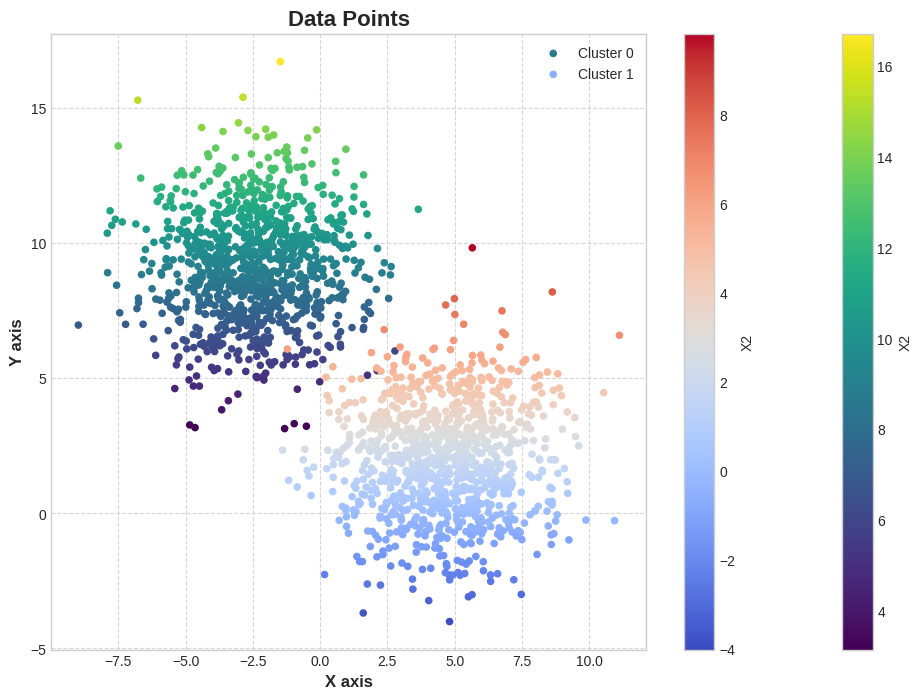

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
X, Y = make_blobs(n_samples=2000, cluster_std=2, n_features=2, centers=2, random_state=42)

# Create DataFrame with labels
data = pd.DataFrame(np.column_stack((X, Y)), columns=["X1", "X2", "Y"])
display(data)
data["Y"] = data["Y"].astype(int)  # Ensure Y is int for indexing

# Plotting
plt.style.use("seaborn-v0_8-whitegrid")
colors = [plt.cm.viridis, plt.cm.coolwarm, "Blue", "Indigo"]
fig, ax = plt.subplots(figsize=(12, 8))

for label, group in data.groupby("Y"):
    group.plot(kind="scatter", x="X1", y="X2", ax=ax, label=f"Cluster {label}", c="X2", cmap=colors[label])
    
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.title("Data Points", fontsize=16, weight="bold")
plt.grid(linestyle="--", alpha=0.8)
plt.show()


In [ ]:
X1 = data["X1"]
X2 = data["X2"]
Y = data["Y"]
X

array([[-4.48840726,  8.76271229],
       [-1.54717916,  9.46205418],
       [-1.33548344, 13.39519738],
       ...,
       [ 8.30499292,  3.60147321],
       [-2.57862116,  6.67693005],
       [ 4.84675509,  6.05732176]])

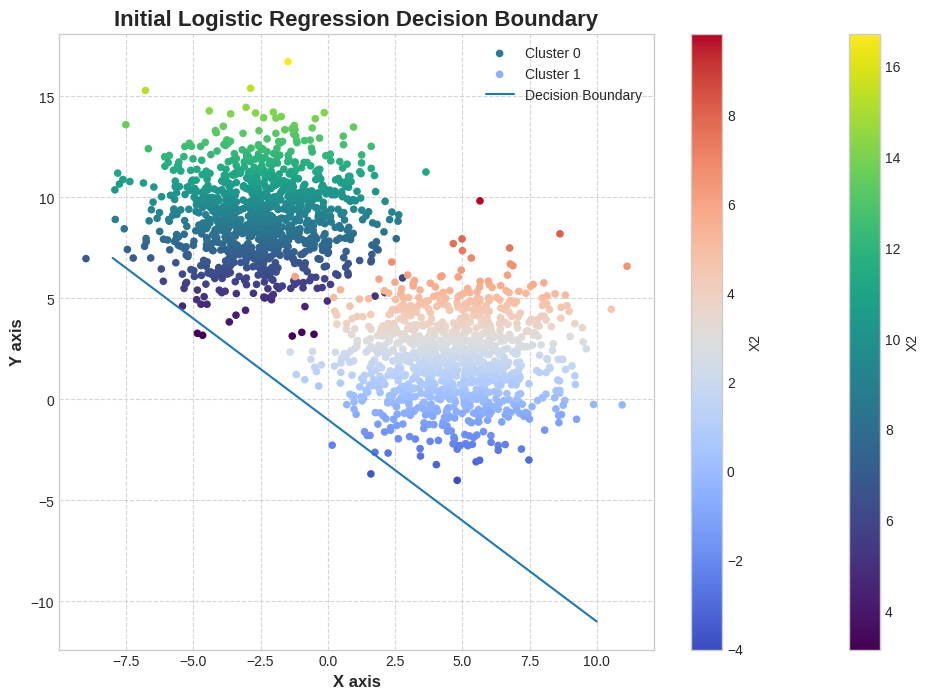

In [ ]:
W = [1, 1, 1]
xval = np.linspace(-8, 10, 1000)
y = -(W[0]/W[2]) - (W[1]/W[2]) * xval

colors = [plt.cm.viridis, plt.cm.coolwarm, "Blue", "Indigo"]
fig, ax = plt.subplots(figsize=(12, 8))

for label, group in data.groupby("Y"):
    group.plot(kind="scatter", x="X1", y="X2", ax=ax, label=f"Cluster {label}", c="X2", cmap=colors[label])
    
plt.plot(xval, y, label="Decision Boundary")
plt.xlabel("X axis", fontsize=12, weight="bold")
plt.ylabel("Y axis", fontsize=12, weight="bold")
plt.title("Initial Logistic Regression Decision Boundary", fontsize=16, weight="bold")
plt.legend()
plt.grid(linestyle="--", alpha=0.8)
plt.show()


### Logistic Regression - Mathematical Formulation

**1. Sigmoid Function:**
$
\sigma(z) = \frac{1}{1 + e^{-z}}
$

**2. Hypothesis:**
$
\hat{y} = \sigma(w_0 + w_1 x_1 + w_2 x_2)
$

**3. Loss Function:**
$
\mathcal{L} = -[y \log(\hat{y}) + (1-y)\log(1-\hat{y})]
$

**4. Gradients:**
$
\frac{\partial \mathcal{L}}{\partial w_0} = -(y - \hat{y})
$
$
\frac{\partial \mathcal{L}}{\partial w_1} = -(y - \hat{y})x_1
$
$
\frac{\partial \mathcal{L}}{\partial w_2} = -(y - \hat{y})x_2
$

**5. Weight Update:**
$
w_j = w_j - \alpha \frac{\partial \mathcal{L}}{\partial w_j}
$

**Notation:**
- $x_1, x_2$: Input features
- $w_0$: Bias
- $w_1, w_2$: Weights
- $\hat{y}$: Prediction
- $y$: True label
- $\alpha$: Learning rate

### Functions for Logistic Regression And Implementation

In [ ]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def h(X, W):
    z = np.array(W[0] + W[1] * X[:, 0] + W[2] * X[:, 1])
    return sigmoid(z)

def loss(ypred, Y):
    epsilon = 1e-10
    loss_value = -1 * np.sum(Y * np.log(ypred + epsilon) + (1 - Y) * np.log(1 - ypred + epsilon))
    return loss_value

def gradient(ypred, X, Y=Y):
    error = ypred - Y
    g0 = np.sum(error)
    g1 = np.sum(error * X[:, 0])
    g2 = np.sum(error * X[:, 1])
    return [g0, g1, g2]

def gradient_descent(X, Y, lr=0.001, epoch_limit=1000):
    W = [1, 1, 1]
    losses = []
    j = 0
    while True:
        ypred = h(X, W)
        loss_value = loss(ypred, Y)
        g = gradient(ypred, X)
        W[0] = W[0] - lr * g[0]
        W[1] = W[1] - lr * g[1]
        W[2] = W[2] - lr * g[2]
        losses.append(loss_value)
        print(f"Loss : {loss_value:.2f}, Weights : {W[0]:.2f}, {W[1]:.2f}, {W[2]:.2f}, Epoch : {j}")
        j = j + 1
        if(j>epoch_limit):
            return W, losses
        
epochs = 400
W_new, losses = gradient_descent(X, Y, epoch_limit=epochs)
W_new


Loss : 7703.85, Weights : 0.02, 3.41, -8.07, Epoch : 0
Loss : 6316.68, Weights : 0.54, 5.53, -6.31, Epoch : 1
Loss : 1882.11, Weights : 0.74, 6.10, -5.49, Epoch : 2
Loss : 1097.80, Weights : 0.88, 6.40, -4.94, Epoch : 3
Loss : 742.25, Weights : 0.99, 6.60, -4.51, Epoch : 4
Loss : 543.97, Weights : 1.07, 6.73, -4.19, Epoch : 5
Loss : 431.00, Weights : 1.14, 6.82, -3.93, Epoch : 6
Loss : 362.50, Weights : 1.20, 6.88, -3.73, Epoch : 7
Loss : 318.34, Weights : 1.25, 6.92, -3.55, Epoch : 8
Loss : 286.18, Weights : 1.30, 6.95, -3.39, Epoch : 9
Loss : 260.99, Weights : 1.34, 6.98, -3.25, Epoch : 10
Loss : 240.57, Weights : 1.38, 7.00, -3.12, Epoch : 11
Loss : 223.69, Weights : 1.41, 7.01, -3.01, Epoch : 12
Loss : 209.52, Weights : 1.45, 7.02, -2.90, Epoch : 13
Loss : 197.49, Weights : 1.48, 7.03, -2.80, Epoch : 14
Loss : 187.24, Weights : 1.51, 7.04, -2.70, Epoch : 15
Loss : 178.51, Weights : 1.54, 7.04, -2.62, Epoch : 16
Loss : 171.17, Weights : 1.56, 7.04, -2.54, Epoch : 17
Loss : 165.12, W

[np.float64(4.8442678847457135),
 np.float64(1.8331430262055772),
 np.float64(-1.2909954016407412)]

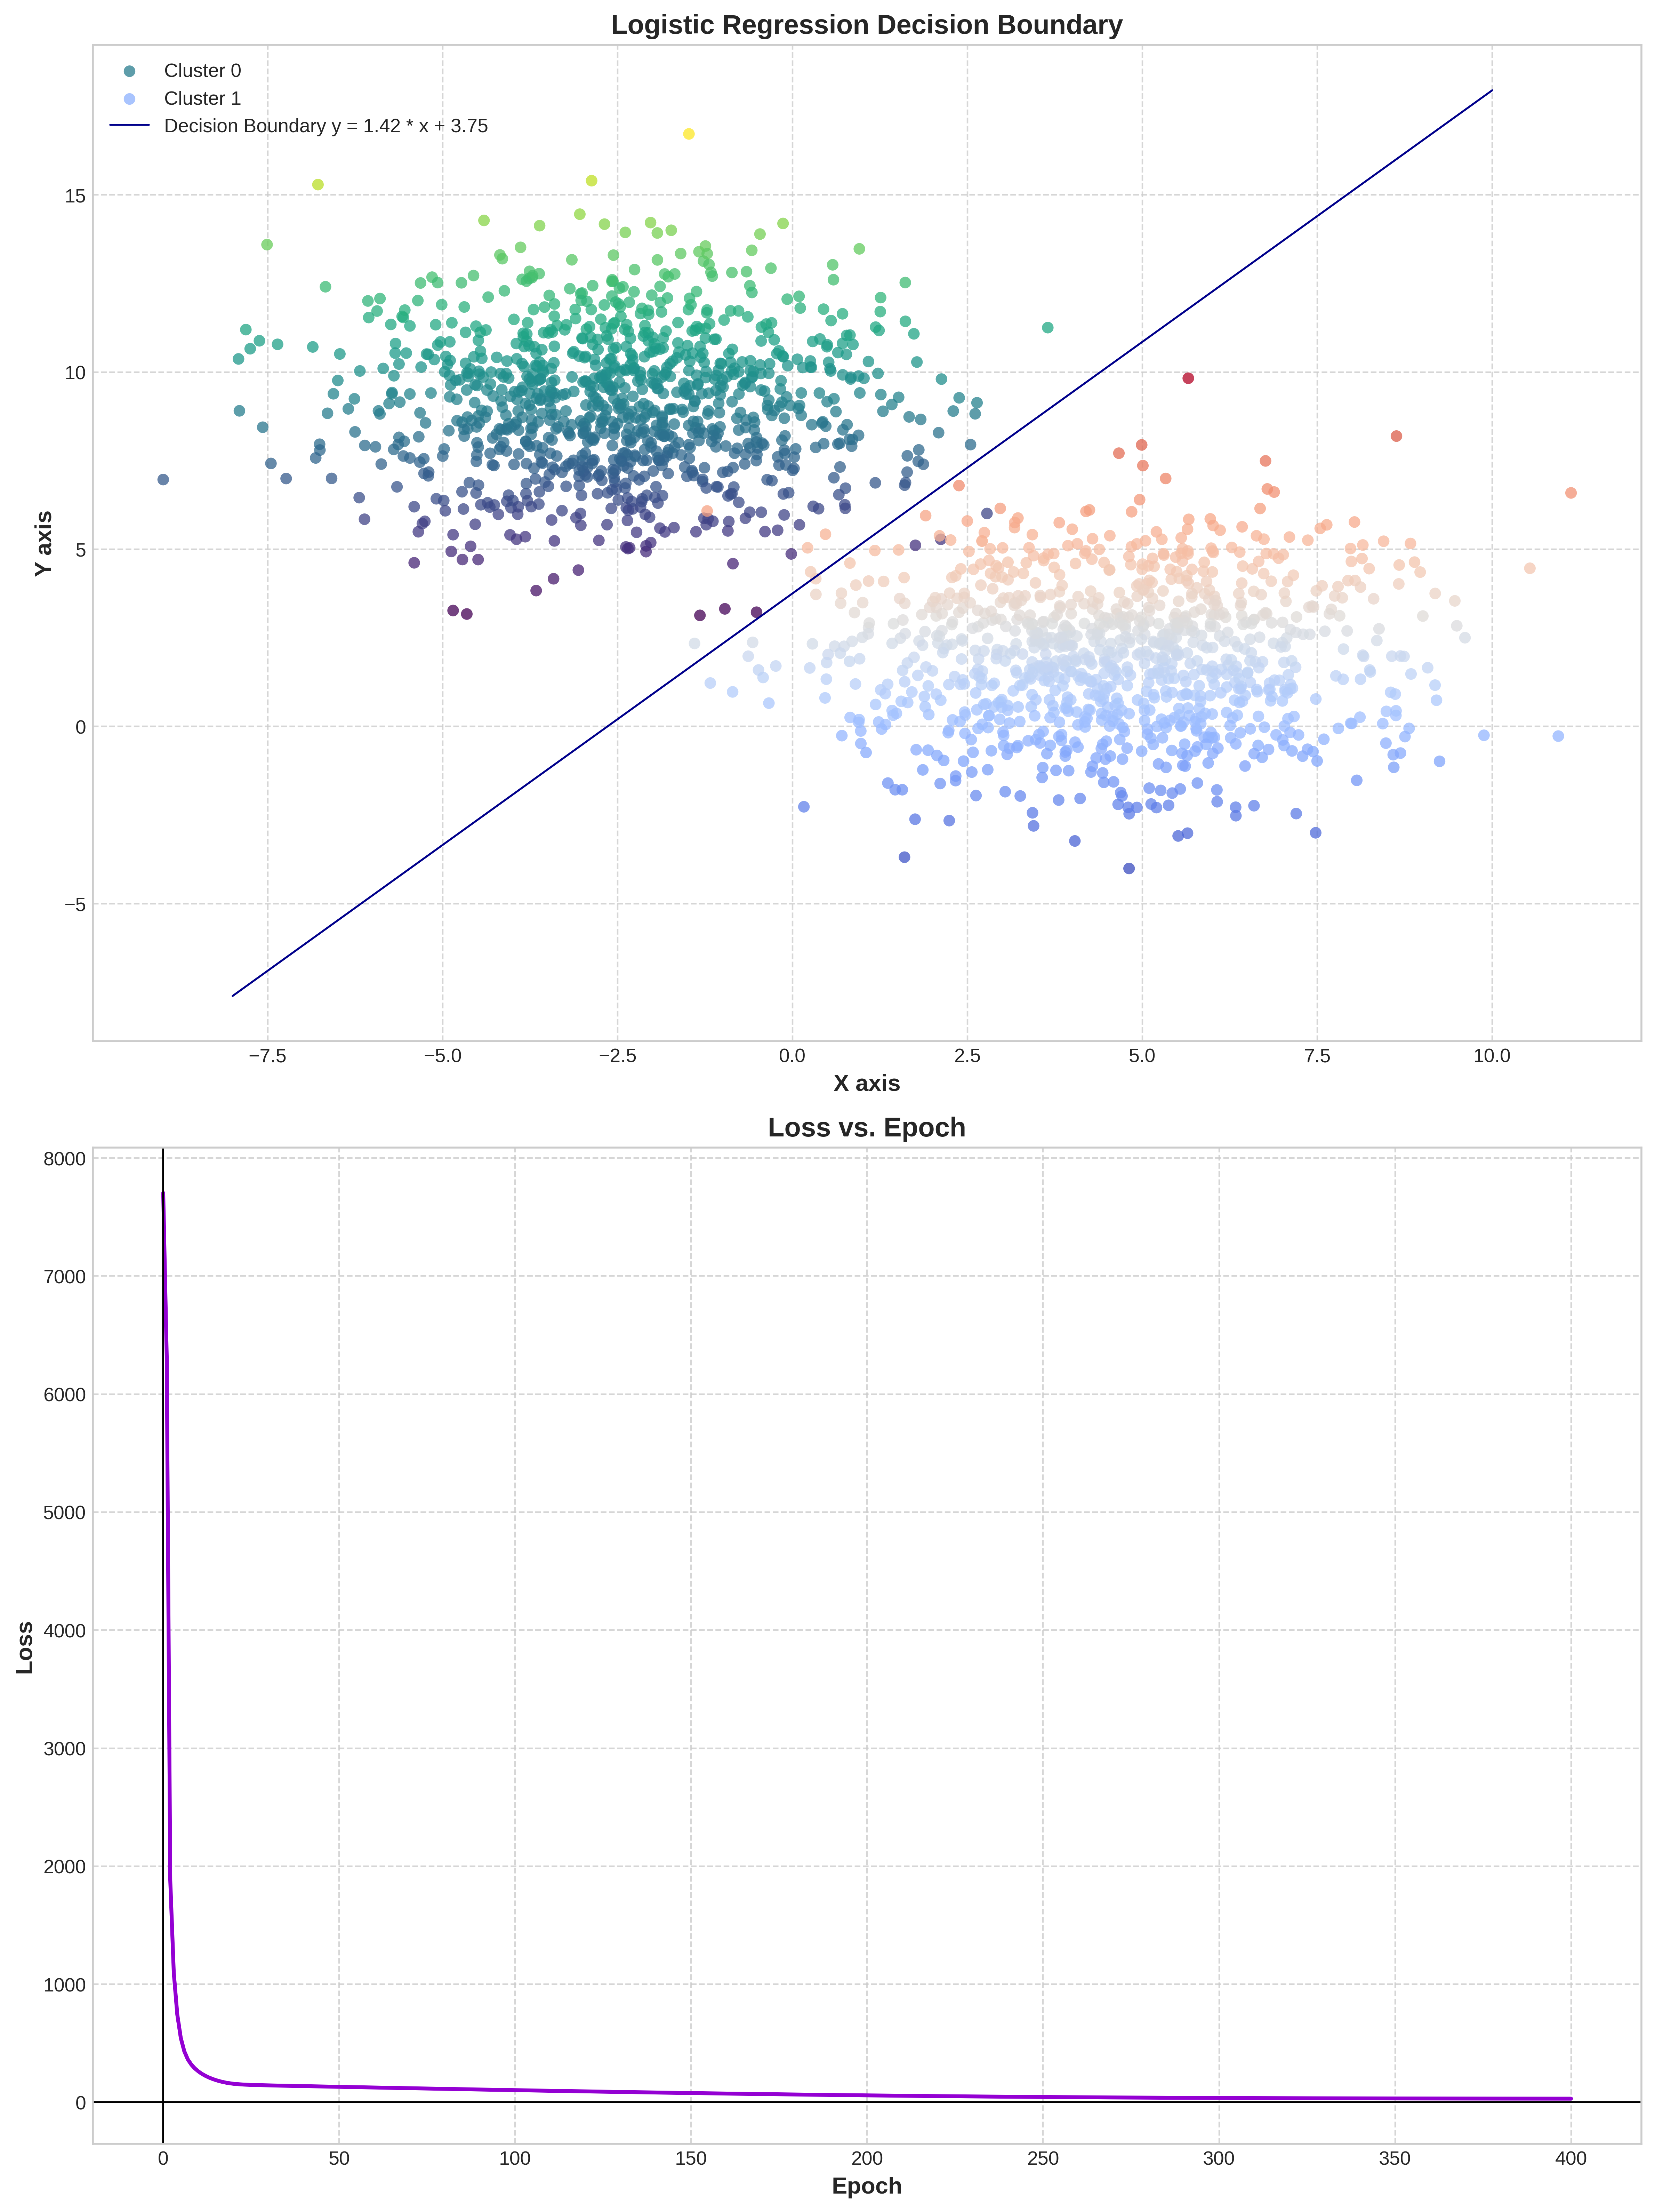

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16), dpi=400)

# Decision boundary
xval = np.linspace(-8, 10, 1000)
W = W_new
y = -(W[0]/W[2]) - (W[1]/W[2]) * xval

# Custom scatter plot without colorbars
colors = [plt.cm.viridis, plt.cm.coolwarm]
for label, group in data.groupby("Y"):
    ax1.scatter(group["X1"], group["X2"], 
                label=f"Cluster {label}", 
                c=group["X2"], 
                cmap=colors[label], 
                edgecolors='none', 
                alpha=0.75)

# Decision boundary line
ax1.plot(xval, y, color="darkblue", linewidth=1, 
         label=f"Decision Boundary y = {-(W[1]/W[2]):.2f} * x + {-(W[0]/W[2]):.2f}")
ax1.set_xlabel("X axis", fontsize=12, weight="bold")
ax1.set_ylabel("Y axis", fontsize=12, weight="bold")
ax1.set_title("Logistic Regression Decision Boundary", fontsize=14, weight="bold")
ax1.legend()
ax1.grid(linestyle="--", alpha=0.8)

# Loss curve
ax2.plot(losses, color="darkviolet", linewidth=2)
ax2.axhline(y=0, color='black', linewidth=1)
ax2.axvline(x=0, color='black', linewidth=1)
ax2.set_xlabel("Epoch", fontsize=12, weight="bold")
ax2.set_ylabel("Loss", fontsize=12, weight="bold")
ax2.set_title("Loss vs. Epoch", fontsize=14, weight="bold")
ax2.grid(linestyle="--", alpha=0.8)

plt.tight_layout()
plt.show()
